## Forecasting COVID-19 Daily New Cases with Prophet

In this section, we use Facebook Prophet, a time series forecasting library, to predict daily new COVID-19 cases globally.

**Approach:**
- We start with a pre-processed time series of daily new cases.
- Prophet automatically detects trends, seasonality, and holidays/outliers in the data.
- We fit the Prophet model to the historical data and generate a forecast for the next 30 days.
- The forecast plot shows both the predicted trend and the uncertainty interval.
- We also plot model components to understand seasonality and overall trends.


In [1]:
pip install prophet


     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     ---------------------------------------- 44.4/44.4 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.4/13.3 MB 8.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/13.3 MB 9.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/13.3 MB 8.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.7/13.3 MB 9.7 MB/s eta 0:00:02
   ------ --------------------------------- 2.1/13.3 MB 9.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.5/13.3 MB 9.5 MB/s eta 0:00:02
   -------- ------------------------------- 3.0/13.3 MB 9.5 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/13.3 MB 9.5 MB/s eta 0:00:02
   -------

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare your data for Prophet: must have columns ['ds', 'y']
df = pd.read_csv('global_covid_new_cases.csv', parse_dates=['date'])
prophet_df = df[['date', 'smoothed_new_cases']].rename(columns={'date': 'ds', 'smoothed_new_cases': 'y'})

# Initialize and fit the Prophet model on the time series data
model = Prophet()
model.fit(prophet_df)

01:40:52 - cmdstanpy - INFO - Chain [1] start processing
01:40:52 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Create a dataframe for future dates (here, we forecast 30 days into the future)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)    # Generate the forecast for both historical and future dates

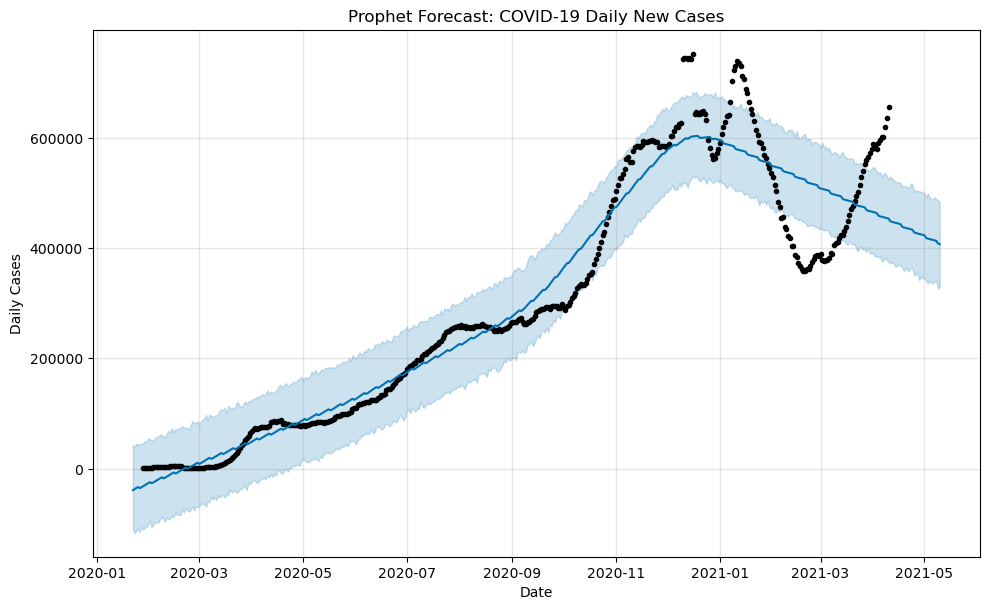

In [ ]:
# Generate the forecast for both historical and future dates

# Plot the forecast. The plot shows:
# - Black dots: actual historical data points
# - Blue line: model forecast
# - Light blue area: forecast uncertainty interval

model.plot(forecast)
plt.title('Prophet Forecast: COVID-19 Daily New Cases')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.show()

## Tip:

If you want to fully customize the legend (for example, if you want to match specific lines/patches to labels), you can access the lines in the plot:



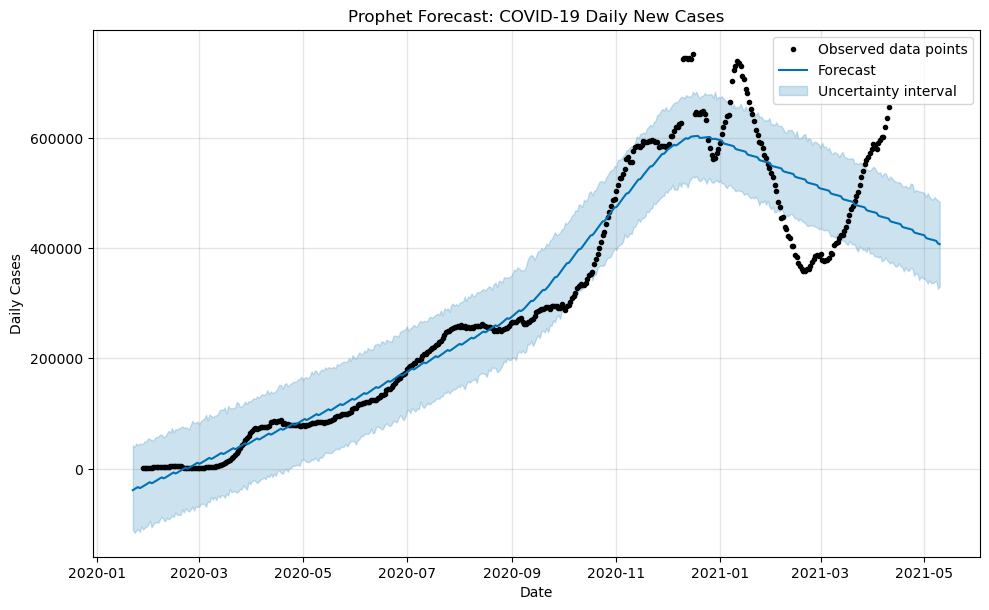

In [7]:
fig = model.plot(forecast)
plt.title('Prophet Forecast: COVID-19 Daily New Cases')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)
plt.show()


## Forecast Components

Prophet allows us to visualize the different components affecting the forecast:
- **Trend:** The overall direction of the data over time.
- **Weekly/Yearly Seasonality:** Recurring patterns detected by the model.
- **Holidays/Events (if provided):** Spikes or drops around known dates.

This helps us interpret what drives changes in daily COVID-19 cases.


## Conclusion

- Prophet enables robust forecasting of time series data with minimal feature engineering.
- The model’s forecasts and uncertainty intervals give us insights into potential future trends.
- Component plots help understand seasonal effects or anomalies in the data.
- This approach can be easily adapted to other forecasting tasks in healthcare and beyond.
